In [1]:
# initial set up (the three lines we always have to start with)
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
# import the fastai vision library
from fastai.vision import *

In [3]:
from pathlib import Path
# create the appropriate path variable that points to the whales directory in your data directory
path = Path('data/expressions/fer2013')
path

PosixPath('data/expressions/fer2013')

In [4]:
import pandas as pd 
import numpy as np 
df_label = pd.read_csv(path/'fer2013.csv')
df_label.describe()

,emotion
count,35887.000000
mean,3.323265
std,1.873819
min,0.000000
25%,2.000000
50%,3.000000
75%,5.000000
max,6.000000


In [12]:
df_label.head(10)

,emotion,Usage
0,0,Training
1,0,Training
2,2,Training
3,4,Training
4,6,Training
5,2,Training
6,4,Training
7,3,Training
8,3,Training
9,2,Training


In [6]:
df_label.drop(['pixels'],axis=1,inplace=True)

In [21]:
df_label.tail(10)

,image,emotion
28699,28700.jpg,6
28700,28701.jpg,4
28701,28702.jpg,2
28702,28703.jpg,0
28703,28704.jpg,5
28704,28705.jpg,2
28705,28706.jpg,0
28706,28707.jpg,4
28707,28708.jpg,0
28708,28709.jpg,4


In [8]:
i = 28710
while i<35887:
    df_label.drop([i], inplace=True)
    i += 1

In [10]:
df_label.drop([28709], inplace=True)

In [13]:
df_label.drop(['Usage'],axis=1,inplace=True)

In [17]:
df_label.insert(0,'image', range(1,28710))


In [20]:
df_label['image'] = df_label['image'].astype(str)+'.jpg'

In [22]:
df_label.to_csv('data/expressions/fer2013/train.csv',index=False)

In [26]:
np.random.seed(42)
data = (ImageItemList.from_csv(path, 'train.csv', folder='Training')
       .random_split_by_pct(0.2)
       .label_from_df(cols='emotion')
       .databunch().normalize(imagenet_stats))

In [27]:
data.classes

[0, 1, 2, 3, 4, 5, 6]

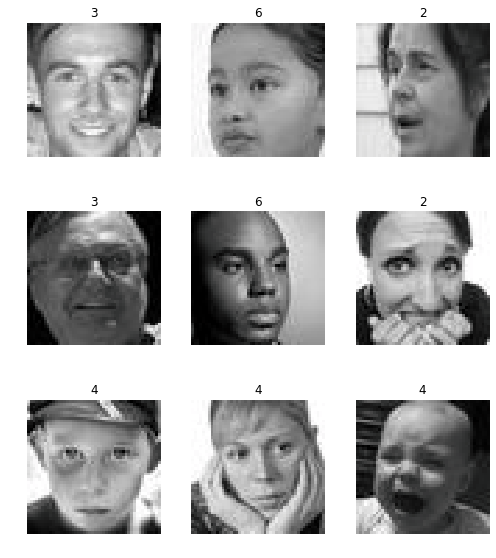

In [28]:
data.show_batch(rows=3, figsize=(7,8))

In [29]:
learn = create_cnn(data, models.resnet50, metrics=error_rate)

In [30]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


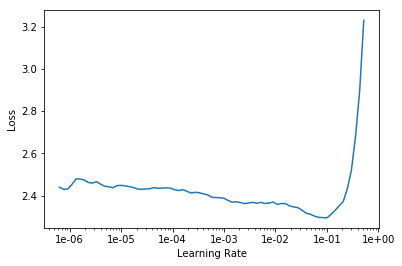

In [31]:
learn.recorder.plot()

In [32]:
lr = 0.01

In [33]:
learn.fit_one_cycle(5, slice(lr))

epoch,train_loss,valid_loss,error_rate
1,1.707460,1.645313,0.640307
2,1.476251,1.387803,0.528479
3,1.307679,1.280814,0.489462
4,1.211777,1.240604,0.469953
5,1.103124,1.247618,0.466818


In [34]:
learn.save('stage-1-rn50')